In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split

#these are for cometics
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

# Training an Artificial Neural Network

In [2]:
# Read the CSV file 'data_Q1.csv' into a pandas DataFrame
Q1_data_df = pd.read_csv('data_Q1.csv')

In [3]:
training_x1 = Q1_data_df.iloc[:, 0].to_numpy()
training_x2 = Q1_data_df.iloc[:,1].to_numpy()
training_y = (Q1_data_df.iloc[:,2].to_numpy()).reshape(-1,1)

N = len(training_x1)
print(N)

200


In [4]:
training_x = np.array([[x1,x2,1] for x1,x2 in zip(training_x1,training_x2)])

## Neural Network Implementation

In this section, we will implement a simple neural network with:
- An **input layer** with $2$ nodes (excluding bias).
- A **hidden layer** with $3$ nodes (excluding bias).
- An **output layer** with a single node.

The neural network follows the transformations:

$$
X \overset{W^{(1)}}{\longrightarrow} H \overset{\sigma}{\longrightarrow} Z \overset{W^{(2)}}{\longrightarrow} O \overset{\sigma}{\longrightarrow} \hat{Y}
$$

where:
- $X$ is the input data of size $N \times 3$.
- $W^{(1)}$ is the weight matrix of size $3 \times 3$, connecting the input layer and the hidden layer.
- $W^{(2)}$ is the weight matrix of size $4 \times 1$, connecting the hidden layer and the output layer.
- $\sigma(x)$ is the **sigmoid activation function**, defined as:

  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$

- $H = X W^{(1)}$ is the matrix obtained at the hidden layer before activation.
- $Z = \sigma(H)$ is the activated hidden layer matrix with an appended bias column.
- $O = Z W^{(2)}$ is the matrix at the output layer before activation.
- $\hat{Y} = \sigma(O)$ is the final predicted output.

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def grad_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

In [7]:
np.random.seed(123)  # Set a random seed for reproducibility

# Initialize weight matrix for input to hidden layer (3x3)
# This connects the input layer (3 nodes including bias) to the hidden layer (3 nodes)
weights1 = np.random.uniform(-1, 1, (3, 3))

# Initialize weight matrix for hidden to output layer (4x1)
# This connects the hidden layer (4 nodes including bias) to the output layer (1 node)
weights2 = np.random.uniform(-1, 1, (4, 1))
# Print the initialized weight matrices for observation
print("Weights from Input to Hidden Layer:\n", weights1)
print("Weights from Hidden to Output Layer:\n", weights2)

Weights from Input to Hidden Layer:
 [[ 0.39293837 -0.42772133 -0.54629709]
 [ 0.10262954  0.43893794 -0.15378708]
 [ 0.9615284   0.36965948 -0.0381362 ]]
Weights from Hidden to Output Layer:
 [[-0.21576496]
 [-0.31364397]
 [ 0.45809941]
 [-0.12285551]]


In [8]:
learning_rate = 0.05
max_epochs = 100

### Mean Squared Error (MSE) Loss
To evaluate the neural network’s performance, we use the **Mean Squared Error (MSE) loss**, defined as:

$$ L(Y, \hat{Y}) = \frac{1}{2N} \sum_{i=1}^{N} (Y_i - \hat{Y}_i)^2 $$

where:
- $ N $ is the number of data points.
- $ Y_i $ represents the true value for the $ i $ th data point.
- $ \hat{Y}_i $ represents the predicted value for the $ i $ th data point.

In [9]:
training_error = []

## Training the Neural Network

The neural network is trained for `max_epochs` iterations, following these steps in each epoch:

### 1. Forward Pass

- **Initialize Inputs:** Set $X$ to the training data (`training_x`).  
- **Compute Hidden Layer Pre-Activation:** Multiply $X$ with the weight matrix $W^{(1)}$ to get $H$.  
- **Apply Activation:** Compute $Z$ by applying the sigmoid function $\sigma(H)$ element-wise.  
- **Add Bias Term:** Append a column of ones to $Z$ for the bias term.  
- **Compute Output Layer Pre-Activation:** Multiply $Z$ with the weight matrix $W^{(2)}$ to get $O$.  
- **Apply Activation to Output:** Compute the final predictions $\hat{Y} = \sigma(O)$.  
- **Calculate Loss:** Measure the difference between the predicted values $\hat{Y}$ and the actual values in `training_y`, and store the loss in `training_error`.  

### 2. Backpropagation

#### (a) Calculating the Gradients for `weights2`
1. Compute the partial derivative of the error function with respect to each weight in $W^{(2)}$:

   $$
   \frac{\partial \mathcal{L}}{\partial W^{(2)}_{k,1}} = \sum_{i=1}^{N} \frac{\partial \mathcal{L}}{\partial \hat{Y}_i} \times \frac{\partial \hat{Y}_i}{\partial O_i} \times \frac{\partial O_i}{\partial W^{(2)}_{k,1}}, \quad k \in \{1,2,3,4\}
   $$

2. Implement this gradient calculation and store the values in `gradient2`, a matrix of the same shape as `weights2`.

#### (b) Calculating the Gradients for `weights1`
1. Compute the partial derivative of the loss function with respect to each weight in $W^{(1)}$:

   $$
   \frac{\partial \mathcal{L}}{\partial W^{(1)}_{k,l}} = \sum_{i=1}^{N} \frac{\partial \mathcal{L}}{\partial \hat{Y}_i} \times \frac{\partial \hat{Y}_i}{\partial O_i} \times \frac{\partial O_i}{\partial Z_{i,l}} \times \frac{\partial Z_{i,l}}{\partial H_{i,l}} \times \frac{\partial H_{i,l}}{\partial W^{(1)}_{k,l}}, \quad k, l \in \{1,2,3\}
   $$

2. Implement this gradient calculation and store the values in `gradient1`, a matrix of the same shape as `weights1`.

#### (c) Gradient Descent
1. Update each entry of the weight matrix `weights2` using the gradient descent rule:

   $$
   W^{(2)}_{k,1} \leftarrow W^{(2)}_{k,1} - \gamma \frac{\partial \mathcal{L}}{\partial W^{(2)}_{k,1}}, \quad k \in \{1,2,3,4\}
   $$

2. Update each entry of the weight matrix `weights1` using the gradient descent rule:

   $$
   W^{(1)}_{k,l} \leftarrow W^{(1)}_{k,l} - \gamma \frac{\partial \mathcal{L}}{\partial W^{(1)}_{k,l}}, \quad k, l \in \{1,2,3\}
   $$
$\gamma$ is the learning rate parameter


In [10]:
for epoch in range(max_epochs):  
    # Initialize X to the input training data
    X = training_x  

    # Compute H as the matrix multiplication of X and weights1
    # This gives the pre-activation values at the hidden layer
    H = np.dot(X, weights1)  

    # Apply the sigmoid function element-wise to get Z (activated hidden layer)
    Z = sigmoid(H)  

    # Append an all-ones column to Z to account for the bias term in the hidden layer
    Z = np.hstack((Z, np.ones((Z.shape[0], 1))))  

    # Compute O as the product of Z and weights2
    # This gives the pre-activation values at the output layer
    O = np.dot(Z, weights2)  

    # Apply the sigmoid function element-wise to get final predictions (ŷ)
    y_hat = sigmoid(O)  

    # Compute the loss using Mean Squared Error (MSE)
    loss = np.mean((training_y - y_hat) ** 2) / 2  
    training_error.append(loss)  # Store the training error for analysis

    # Compute the gradient of loss with respect to output layer weights (weights2)
    # temp = dL/dŷ * dŷ/dO (error term at output layer)
    temp = -(training_y - y_hat) * grad_sigmoid(O)  
    gradient2 = Z.T @ temp  # Compute gradient for weights2
    gradient2 /= len(training_y)  # Normalize gradient

    # Compute the gradient for hidden layer weights (weights1)
    # temp propagates error back through the hidden layer
    temp = temp @ weights2[:-1].T * grad_sigmoid(H)  
    gradient1 = training_x.T @ temp  # Compute gradient for weights1
    gradient1 /= len(training_y)  # Normalize gradient

    # Update weights using gradient descent
    weights2 -= learning_rate * gradient2  
    weights1 -= learning_rate * gradient1  


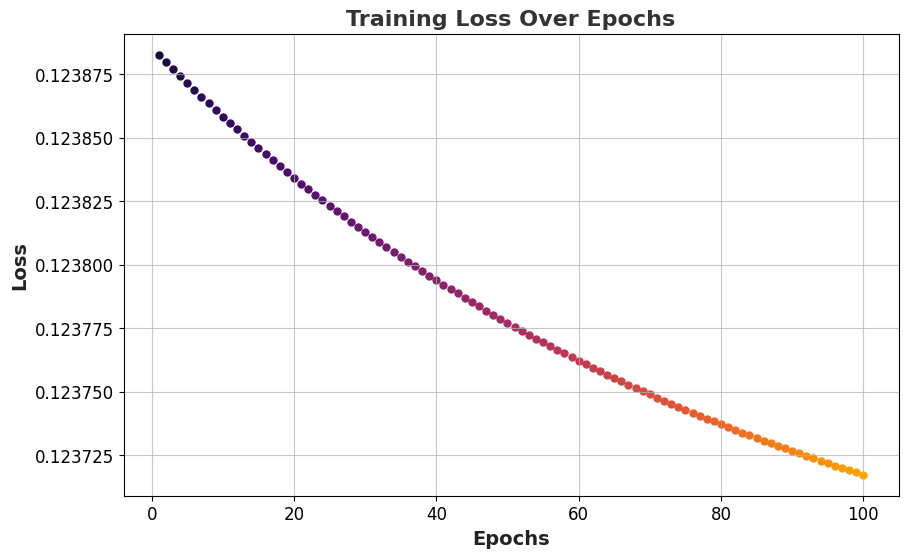

In [11]:
plt.figure(figsize=(10, 6))

# Generate gradient effect from Inferno colormap (Deep Purple → Orange → Yellow)
num_points = len(training_error)
colors = cm.inferno(np.linspace(0.1, 0.8, num_points))  # Create a gradient effect

# Plot each epoch's loss with a scatter plot, applying a gradient color effect
for i in range(num_points):
    plt.scatter(i + 1, training_error[i], color=colors[i], s=25)  # s controls marker size

# Customize plot aesthetics
plt.grid(True, alpha=0.7)
plt.xlabel("Epochs", fontsize=14, fontweight='bold', color='#222')  # X-axis label
plt.ylabel("Loss", fontsize=14, fontweight='bold', color='#222')  # Y-axis label
plt.title("Training Loss Over Epochs", fontsize=16, fontweight='bold', color='#333')

# Improve tick mark visibility
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
# Display the plot
plt.show()

# Classification using the $k$-Nearest Neighbours Technique

In [12]:
# URL of the dataset (UCI Machine Learning Repository - Abalone dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

# Load the dataset into a pandas DataFrame
# Since the dataset has no predefined header, we set header=None
abalone = pd.read_csv(url, header=None)

# Define column names based on the dataset's description
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Assign column names to the DataFrame
abalone.columns = column_names

# Display the first few rows of the dataset
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
# Remove the 'Sex' column from the dataset as it is categorical and may not be needed for numerical analysis
abalone = abalone.drop(columns='Sex')

# Display the first few rows of the modified dataset for verification
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Training and Test Data

To train our model effectively, we need to split our dataset into two parts using Python’s `scikit-learn` library:  

- **Training Dataset:** This subset of data is used to train the model by learning patterns and relationships within the dataset.  
- **Test Dataset:** This separate subset is used to evaluate the model’s performance on unseen data, ensuring that it generalizes well.  

By splitting the dataset, we can assess how well our model performs on new inputs and avoid overfitting.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    abalone.drop(columns=['Rings']).values,  # Features
    abalone['Rings'].values,  # Target variable
    test_size=0.3,  # 30% data for testing, 70% for training
    random_state=333  # Fixing randomness for consistent results
)

# Print the shapes of the training and test sets for verification
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")

Training set size: (2923, 7), (2923,)
Test set size: (1254, 7), (1254,)


In [15]:
# New abalone sample (from Table 1)
new_abalone = np.array([[0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208]])  # Adjust for one-hot encoding

## Implementing the *k*-Nearest Neighbors Algorithm  

The goal is to predict the age of a new abalone using the *k*-Nearest Neighbors (KNN) algorithm based on physical measurements. The process involves the following steps:

1. **Compute Euclidean Distance:**  
   For each training data point in $X_{\text{train}}$, calculate its Euclidean distance from the new data point $X_{\text{new}}$ using NumPy’s `linalg.norm()` method:

   $$
   d(X_{\text{train}, i}, X_{\text{new}}) = \sqrt{\sum_{k=1}^{n} (X_{\text{train}, i, k} - X_{\text{new}, k})^2}
   $$

   Store these distances in a variable called `distances`.

2. **Find the 3 Nearest Neighbors:**  
   - Sort `distances` in ascending order.  
   - Extract the indices of the three smallest distances using `.argsort()`.  
   - These indices correspond to the three closest neighbors in the dataset.  

3. **Predict the Age:**  
   - Retrieve the number of rings (age) from `y_train` for the three nearest neighbors.  
   - Select the most frequently occurring age (mode) as the predicted age.  
   - If multiple ages appear equally often, pick one randomly.

4. **Predict for the Test Set & Compute Mean Squared Error (MSE):**  
   - Apply the above steps to each row in `X_{\text{test}}` to obtain predicted ages, storing them in `predicted_ages_test`.  
   - Compute the **Mean Squared Error (MSE)** to evaluate prediction accuracy:

     $$
     \text{MSE} = \frac{1}{M} \sum_{j=0}^{M-1} ( \text{predicted\_ages\_test}[j] - y_{\text{test}}[j] )^2
     $$

   where $M$ is the total number of test samples.

This process allows us to estimate the age of new abalones based on the closest matching samples from the dataset.


In [16]:
# Function to perform k-NN and predict the age
def knn_predict(X_train, y_train, X_test, k):
    predicted_ages = []
    for test_point in X_test:
        distances = np.linalg.norm(X_train - test_point, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        nearest_ages = y_train[nearest_indices]
        predicted_age = st.mode(nearest_ages, keepdims=True)[0][0]
        predicted_ages.append(predicted_age)
    return np.array(predicted_ages)

In [17]:
k = 3

# Compute distances from new abalone sample
distances = np.linalg.norm(X_train - new_abalone, axis=1)

# Find indices of 3 nearest neighbors
nearest_indices = np.argsort(distances)[:k]

# Extract corresponding ages from y_train
nearest_ages = y_train[nearest_indices]

# Determine the most frequent age (mode)
predicted_age_k3 = st.mode(nearest_ages, keepdims=True)[0][0]

print(f"Predicted Age: {predicted_age_k3}")

Predicted Age: 11


## Tuning *k* to Achieve Optimal Performance  

To find the best value of *k* for the *k*-Nearest Neighbors (KNN) algorithm, we follow these steps:

1. **Vary *k* from 1 to 50** and compute the Mean Squared Error (MSE) for each *k*.
2. **Store the computed MSE values** in an array called `mse_values`.
3. **Plot *k* values vs. MSE values**:  
   - The x-axis represents different values of *k*.  
   - The y-axis represents the corresponding MSE values.  
4. **Determine the optimal *k***:  
   - Identify the value of *k* that results in the lowest MSE.  
   - If multiple values of *k* yield the same minimum MSE, select any one randomly.  
5. **Report the optimal *k* and its corresponding MSE**.

This process helps us select the best *k* that minimizes prediction error and enhances the performance of our KNN model.


In [18]:
# Define the range of k values to test (from 1 to 50)
k_values = range(1, 51)

# Initialize an empty list to store the Mean Squared Error (MSE) for each k
mse_values = []

# Iterate over different values of k
for k in k_values:
    # Predict ages for the test set using k-nearest neighbors
    predicted_ages_test = knn_predict(X_train, y_train, X_test, k)
    
    # Compute the Mean Squared Error (MSE) for the current k
    mse = np.mean((predicted_ages_test - y_test) ** 2)
    
    # Store the computed MSE in the list
    mse_values.append(mse)

# Identify the optimal k value (the one with the lowest MSE)
optimal_k = k_values[np.argmin(mse_values)]  # Get k corresponding to the minimum MSE
optimal_mse = min(mse_values)  # Retrieve the minimum MSE value

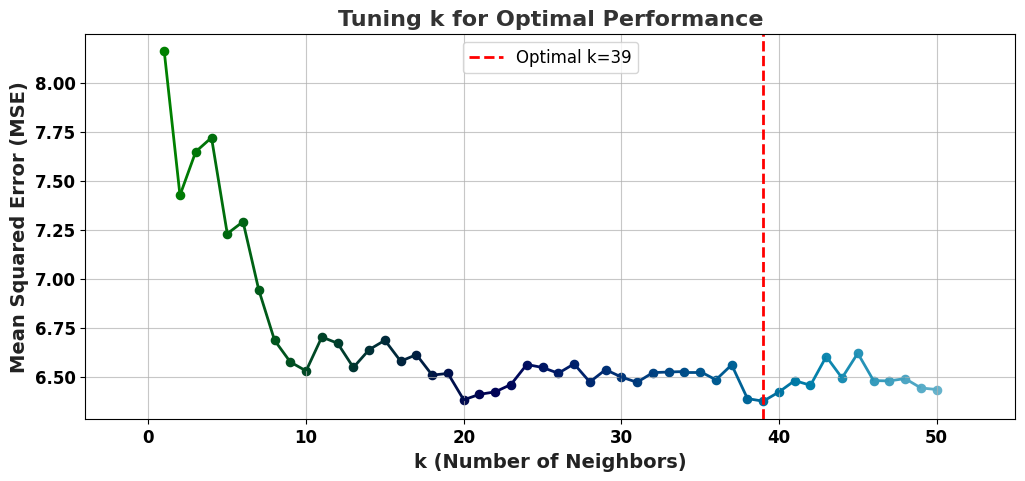

In [28]:
# Generate ocean colormap for the scatter points
colors = cm.ocean(np.linspace(0, 0.8, len(k_values)))

plt.figure(figsize=(12, 5))  # Set figure size for better visualization

# Scatter plot for MSE values with ocean gradient
for i, k in enumerate(k_values):
    plt.scatter(k, mse_values[i], color=colors[i], s=35)  # Each point gets a unique color

# Create line segments to add a smooth gradient effect between points
points = np.array([k_values, mse_values]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap='ocean', norm=plt.Normalize(0, 1))
lc.set_array(np.linspace(0, 0.8, len(k_values)))  # Apply gradient
lc.set_linewidth(2)

plt.gca().add_collection(lc)  # Add gradient line to the plot

# Mark the optimal k value with a red dashed vertical line
plt.axvline(optimal_k, color='r', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')

# Customize x-axis tick intervals and limits
plt.xticks(ticks=np.arange(min(k_values) - 1, max(k_values) + 1, 10))  # Set intervals (0,10,20,...)
plt.xlim(min(k_values) - 5, max(k_values) + 5)  # Extend x-axis range for better spacing

# Customize aesthetics for better readability
plt.grid(True, alpha=0.7)  # Light grid
plt.xlabel('k (Number of Neighbors)', fontsize=14, fontweight='bold', color='#222')
plt.ylabel('Mean Squared Error (MSE)', fontsize=14, fontweight='bold', color='#222')
plt.title('Tuning k for Optimal Performance', fontsize=16, fontweight='bold', color='#333')

# Improve tick mark visibility
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Add legend with a visible frame at the top center
plt.legend(fontsize=12, frameon=True, loc="upper center")

# Display the plot
plt.show()

In [20]:
# Output results
print(f"Optimal k: {optimal_k}")
print(f"Minimum MSE: {optimal_mse}")

Optimal k: 39
Minimum MSE: 6.3740031897926634
